In [ ]:
"""
Code Description:
Plotting median residual values of interested IM vs. Rrup for new simulations of subduction faults 
to find any bugs in the resualts.

Author: Morteza
Version History:
- Version 1.0: Jan 10, 2024
"""

# Import the dependencies

In [3]:
import os
import sys
from pathlib import Path
import pickle
import shutil
import matplotlib.pyplot as plt

sys.path.append(str(Path.cwd().parent))

# Path and directory works

## General path names

In [4]:
root_path = os.getcwd()

data_version = "v24p9"
res_dir = f"/mnt/hypo_data/mab419/Residual_Data/{data_version}"  # dpath to residual pickle data
plot_dir = "/mnt/hypo_data/mab419/mab419_cybershake_investigation/usages/plots/"

## Check if output directory exists

In [5]:
output_dir = os.path.join(plot_dir, "v24p9_sub_vm_border_err_check")

if Path(output_dir).exists():
    prompt = input(
        f"The following path already exists! Do you want to delete and renew (1) or terminate (2)? \n{output_dir}\n"
    )
    if prompt == "1":
        # Remove the folder
        shutil.rmtree(output_dir)
        print(f"Deleted and renewed the path: \n{output_dir}")
        os.makedirs(output_dir, exist_ok=False)
    elif prompt == "2":
        print("Terminating the process.")
        exit()
    else:
        print("Invalid input. Terminating the process.")
        exit()
else:
    os.makedirs(output_dir, exist_ok=False)
    print(f"Created the path: \n{output_dir}")

Deleted and renewed the path: 
/mnt/hypo_data/mab419/mab419_cybershake_investigation/usages/plots/v24p9_sub_vm_border_err_check


# Loading station-r-residual dict from previous pickle file

In [6]:
# Import file name
# If this file does not exist for the specified simulation version, generate it using Residual_Calculator.ipynb
file_name = "Station_Rrup_Res_Dic.pkl"
file_path = os.path.join(res_dir, file_name)
with open(file_path, "rb") as file:
    Station_Rrup_Res_Dic = pickle.load(file)

print("Dictionary loaded successfully")

Dictionary loaded successfully


# Generating Output Plots

## Median Residuals

/tmp/ipykernel_1507253/502917959.py:59: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(10 * cm_to_inch, 6 * cm_to_inch), dpi=300)


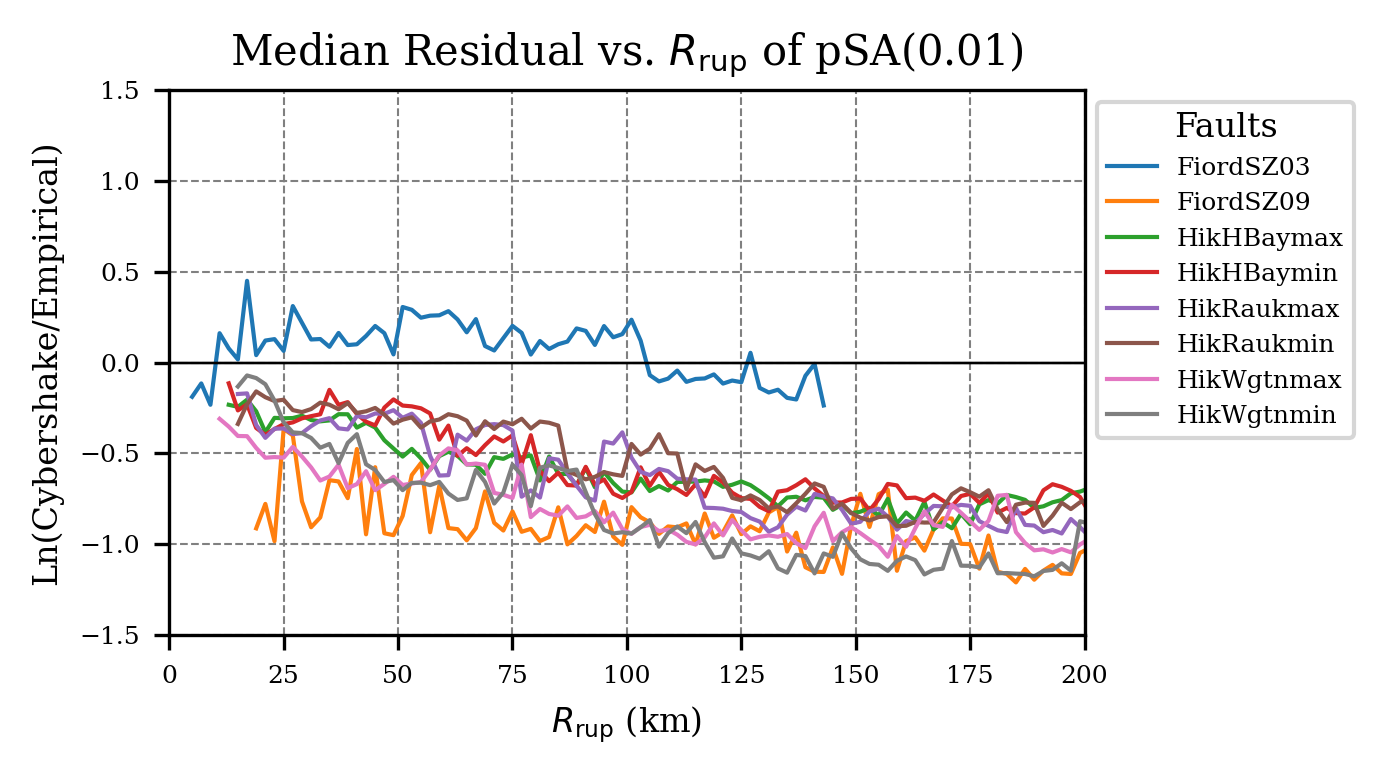

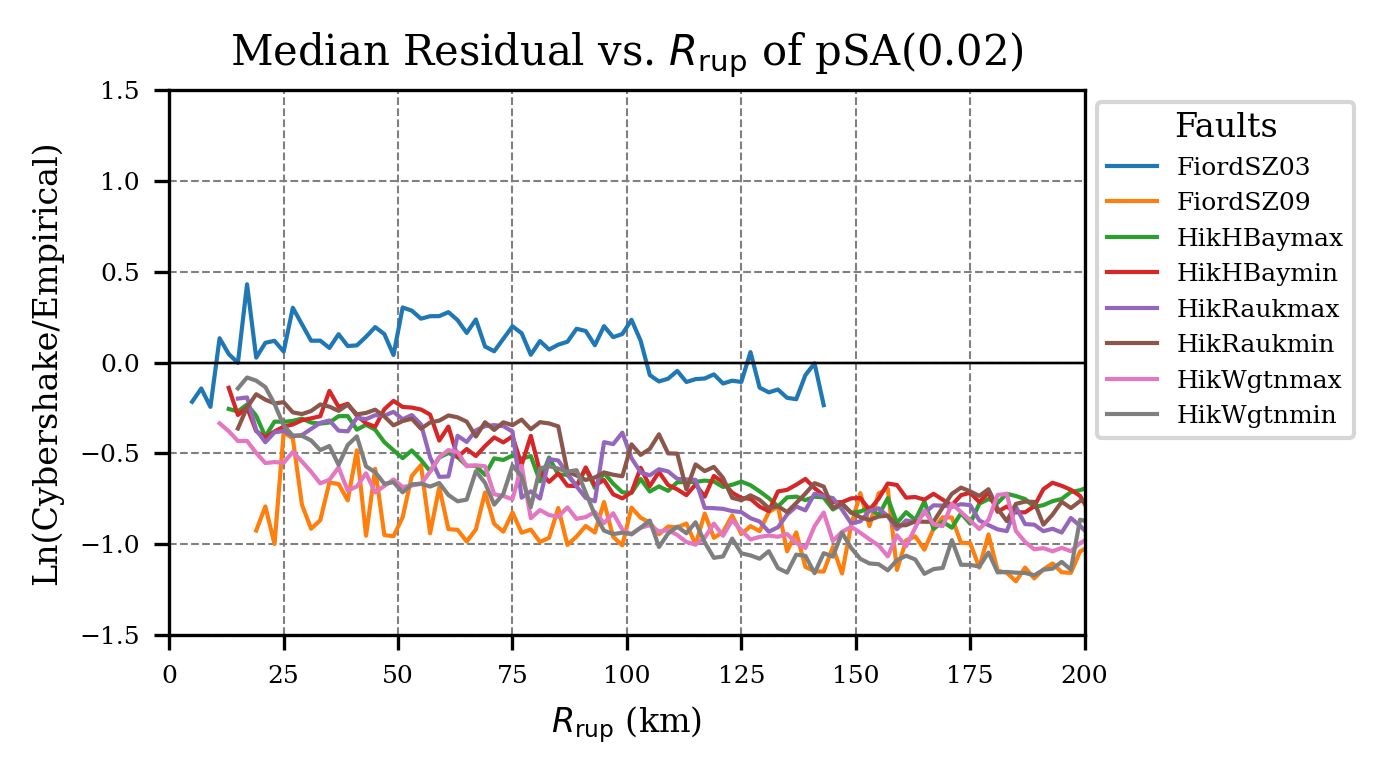

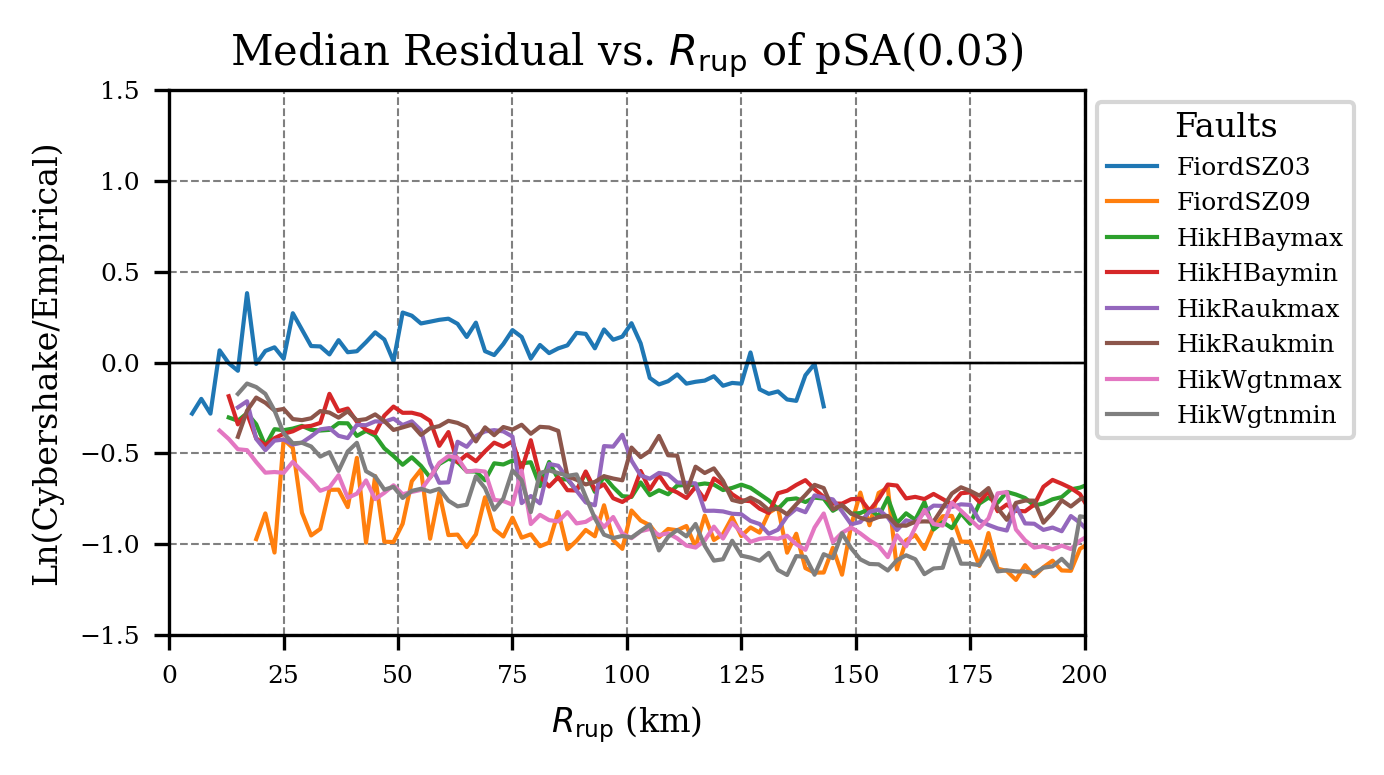

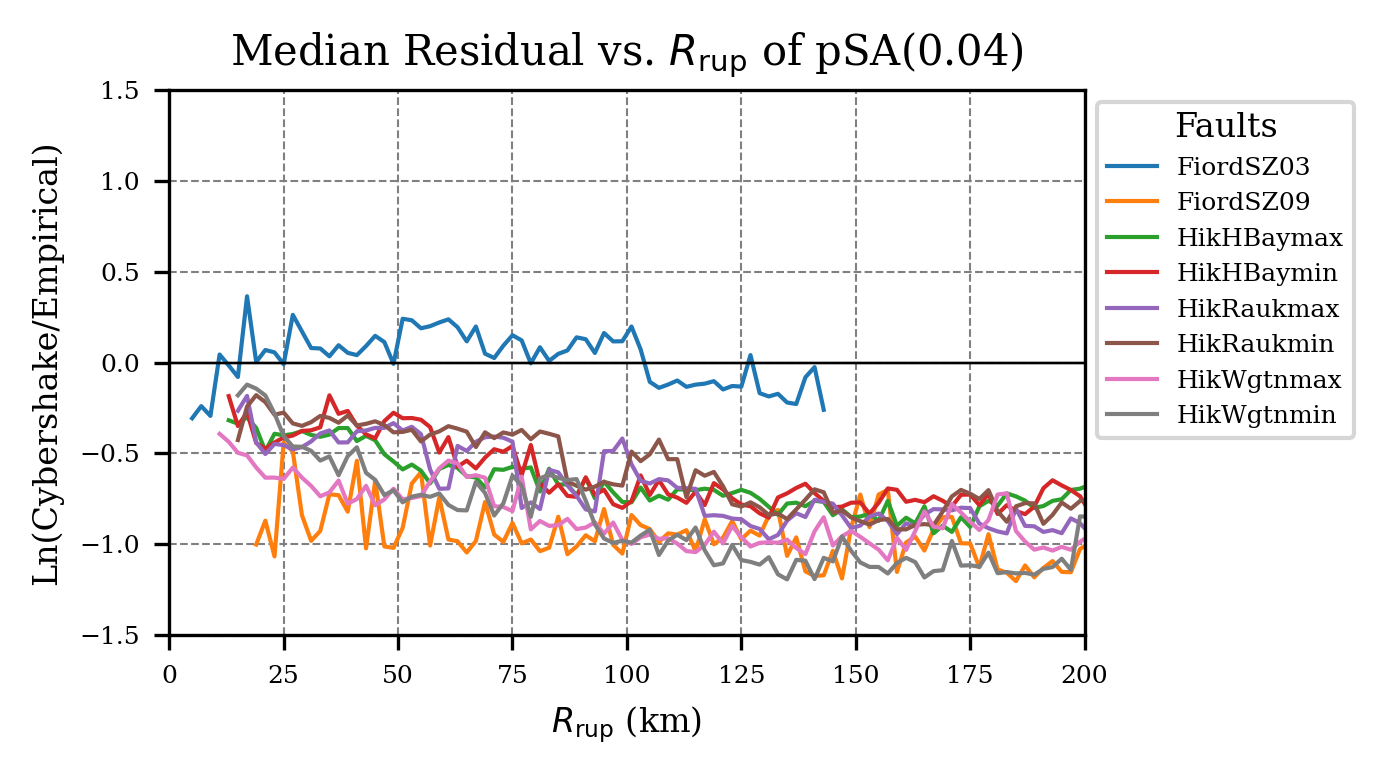

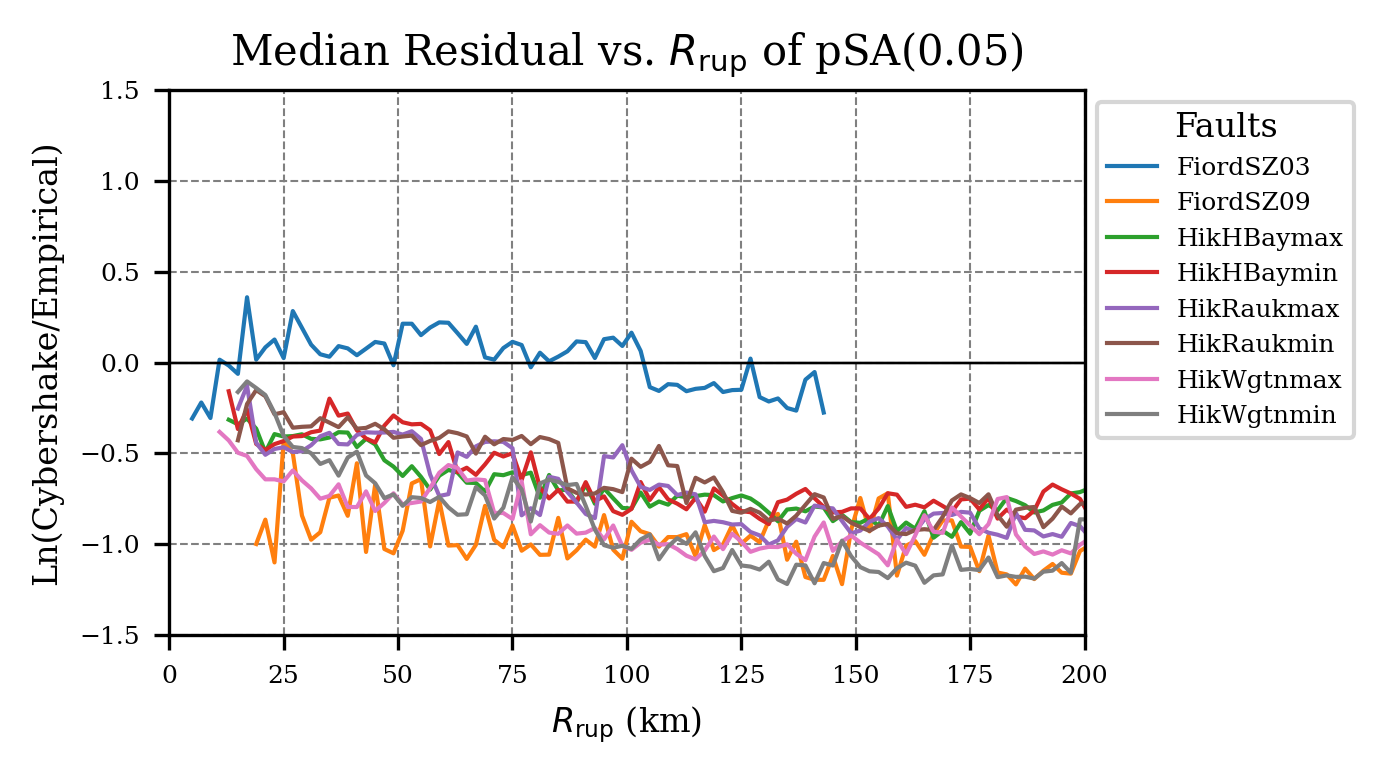

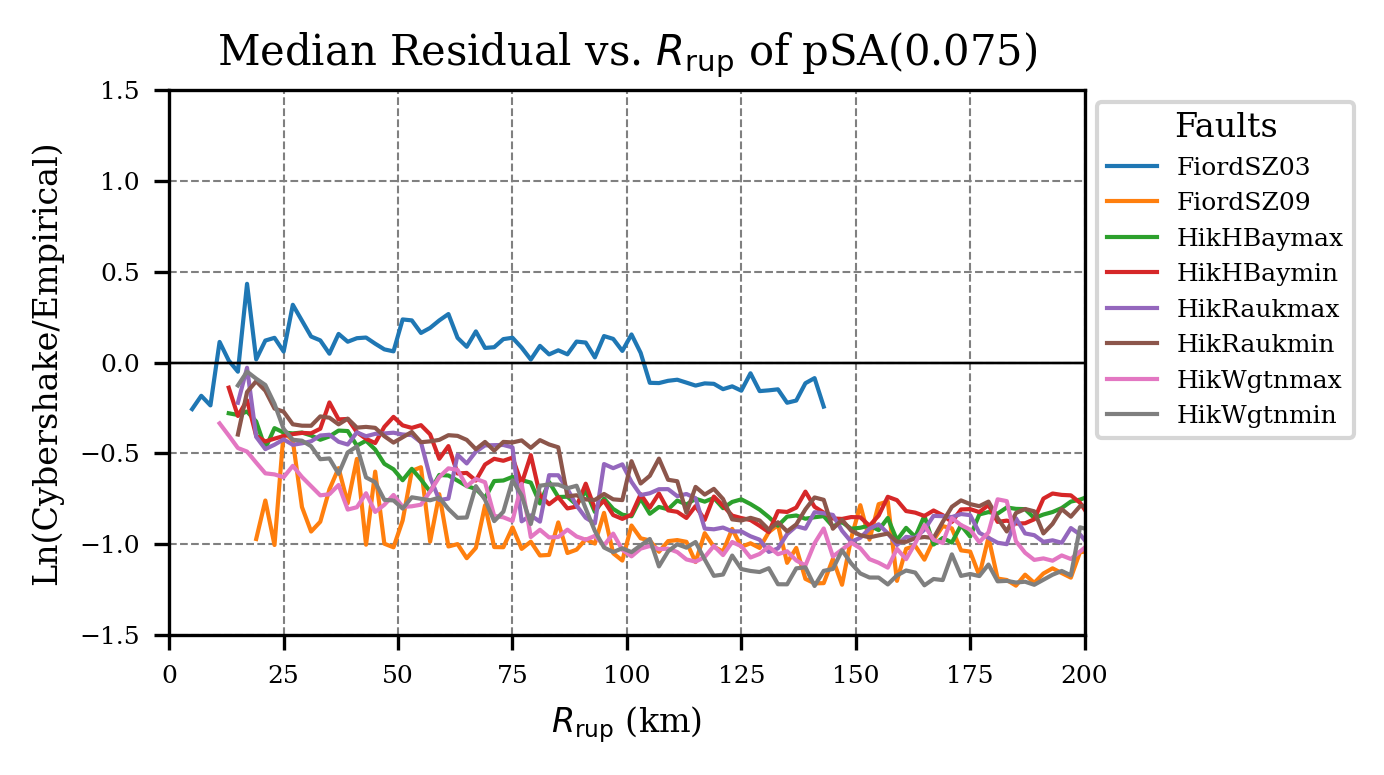

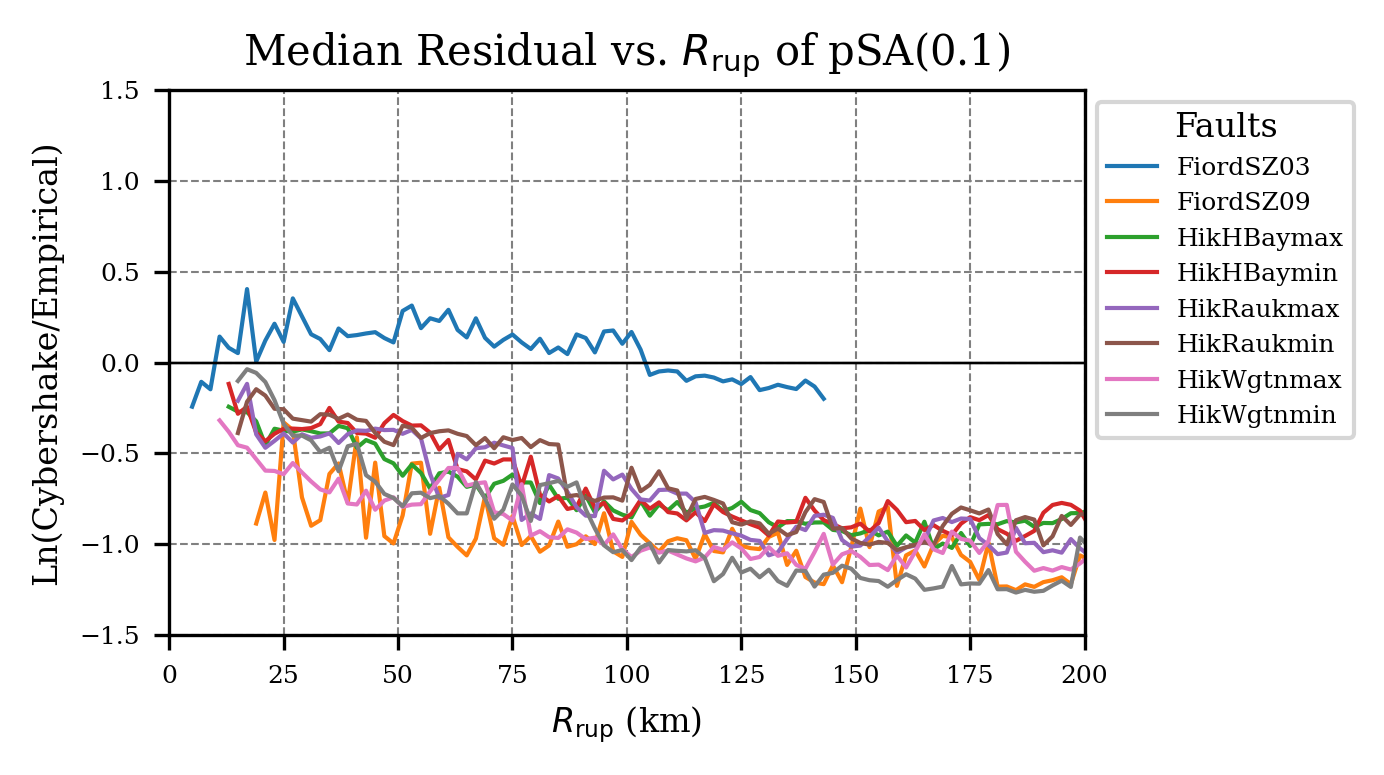

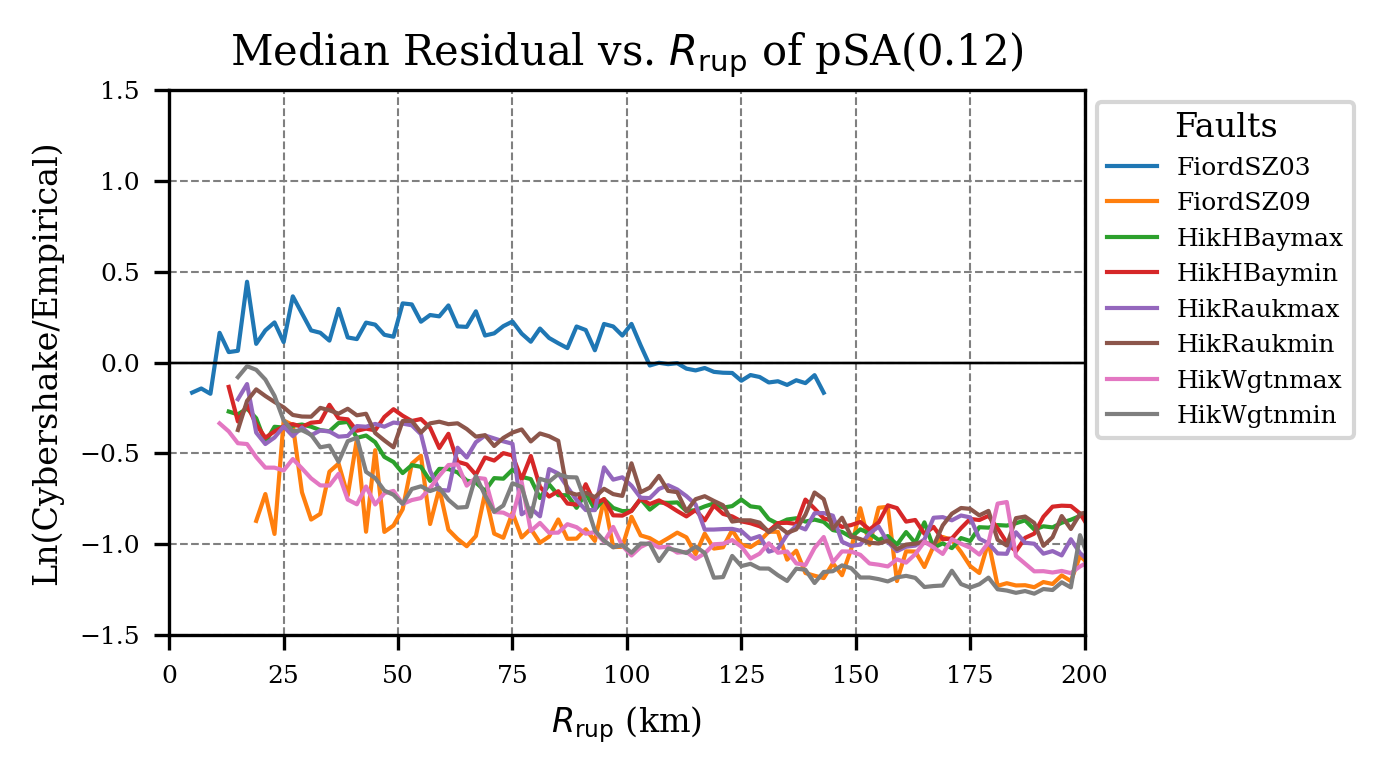

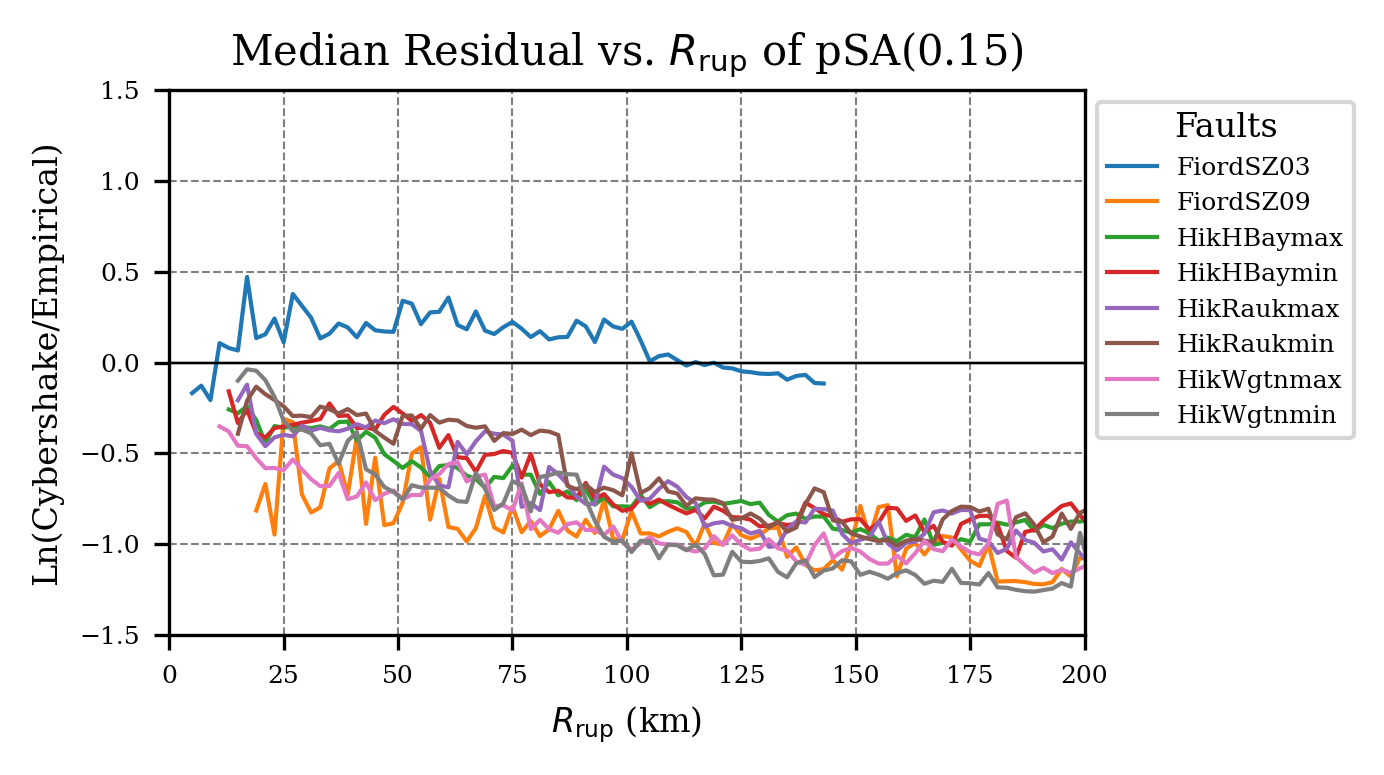

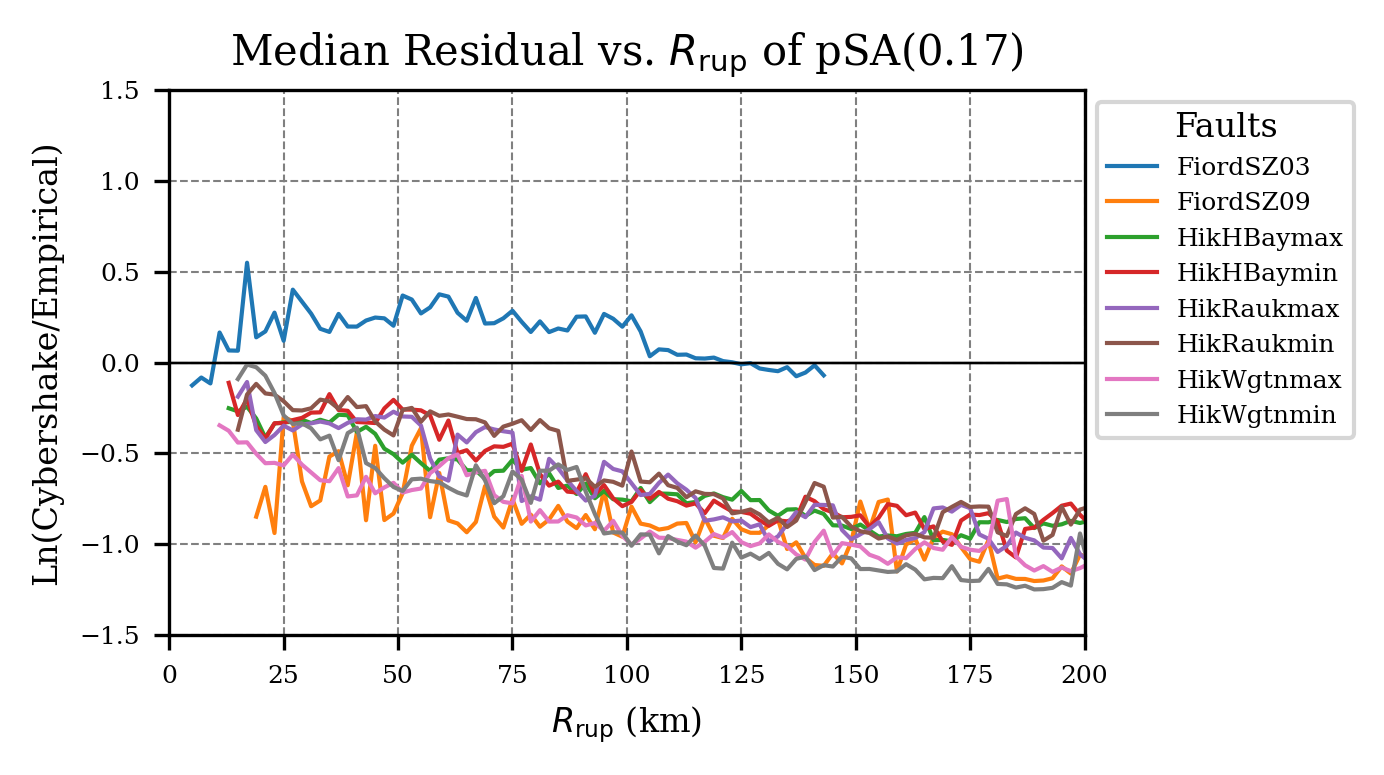

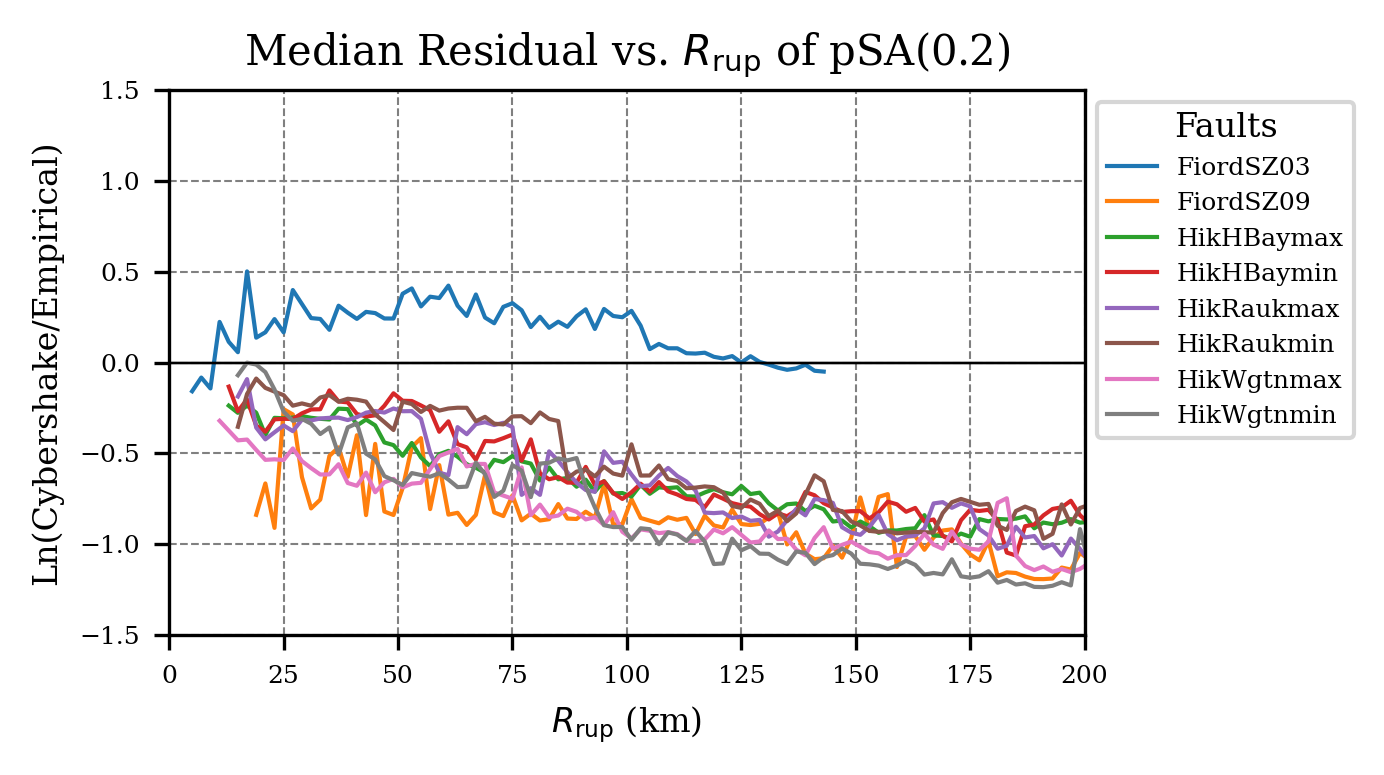

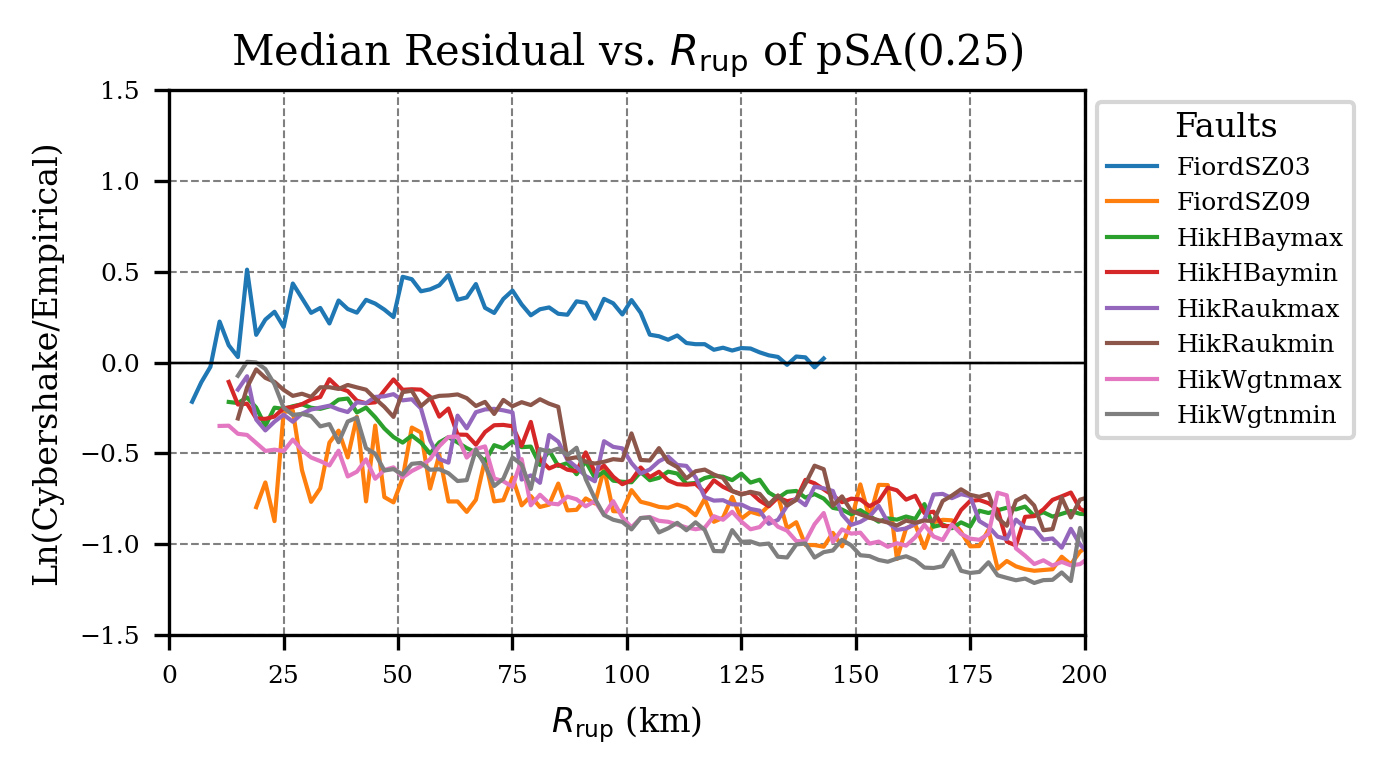

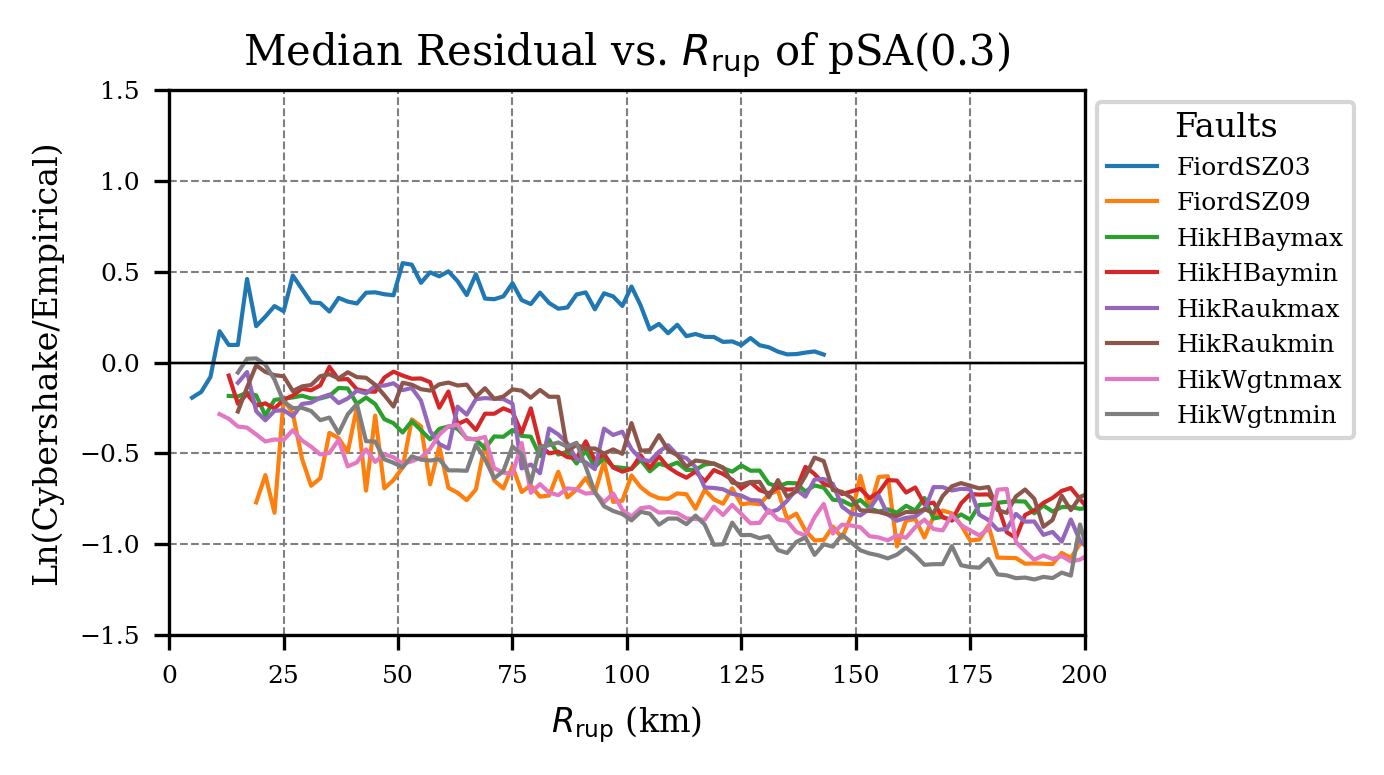

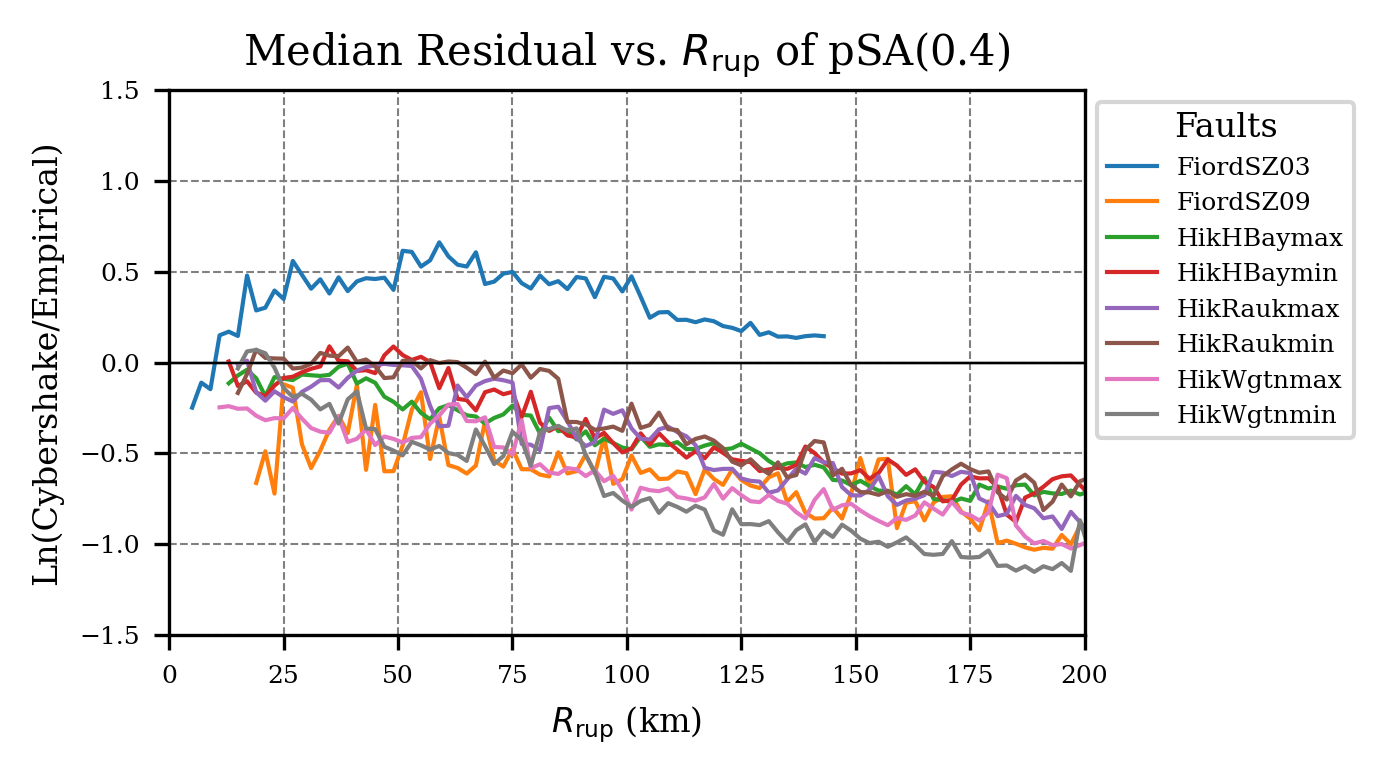

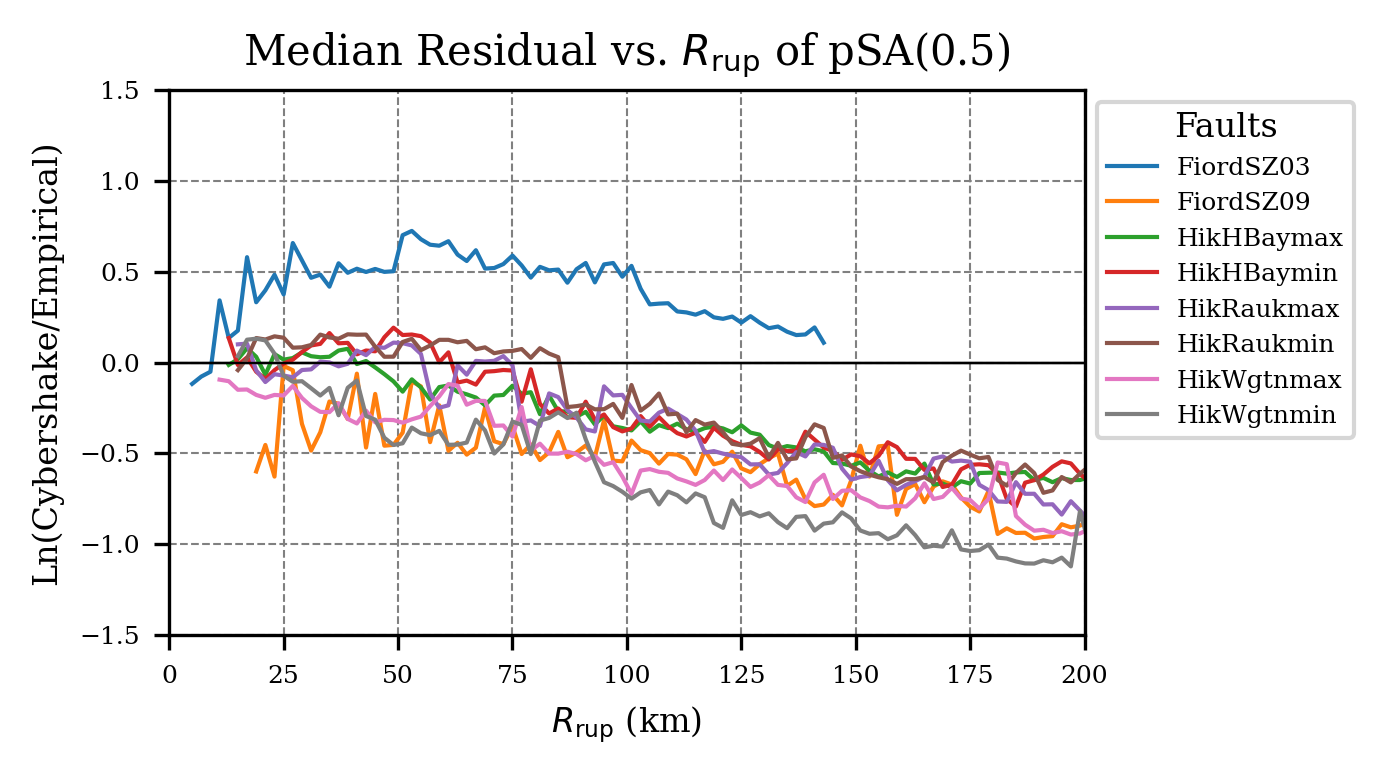

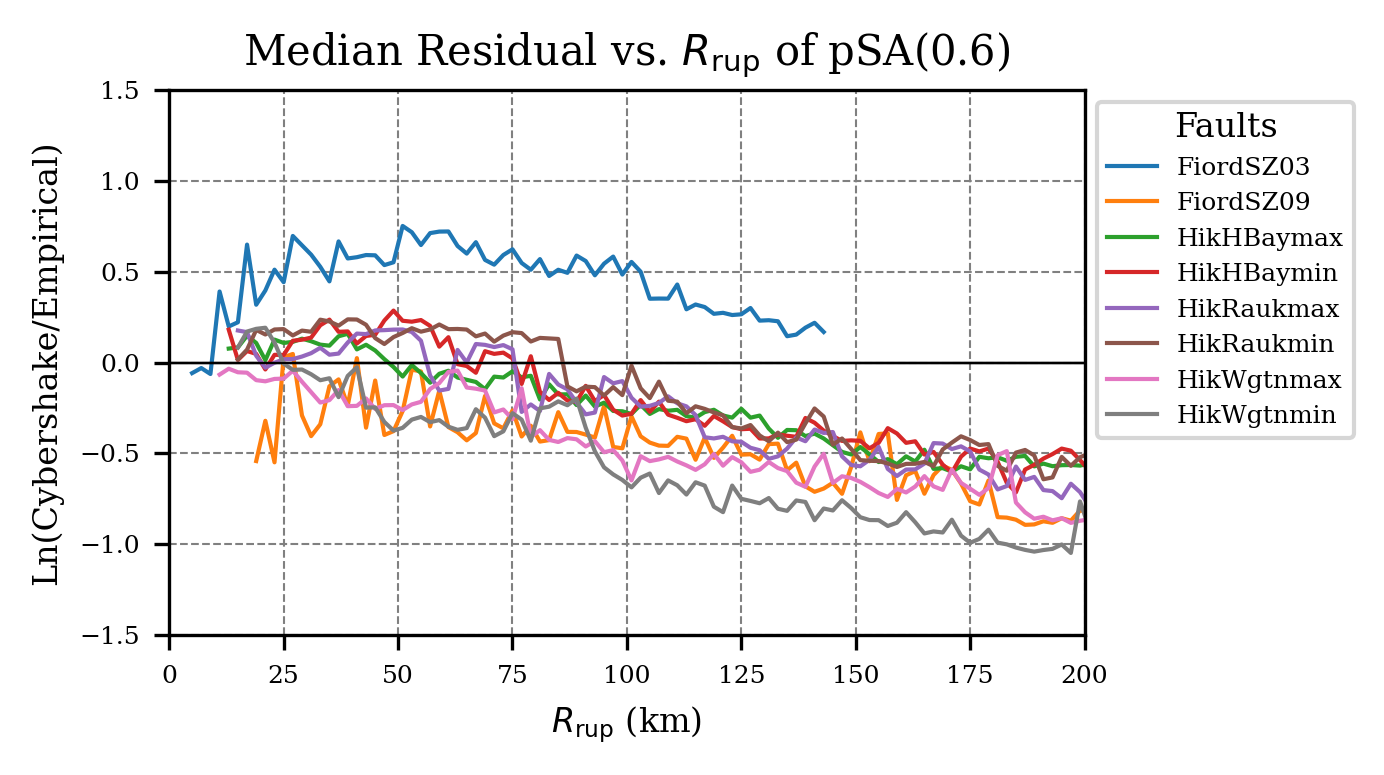

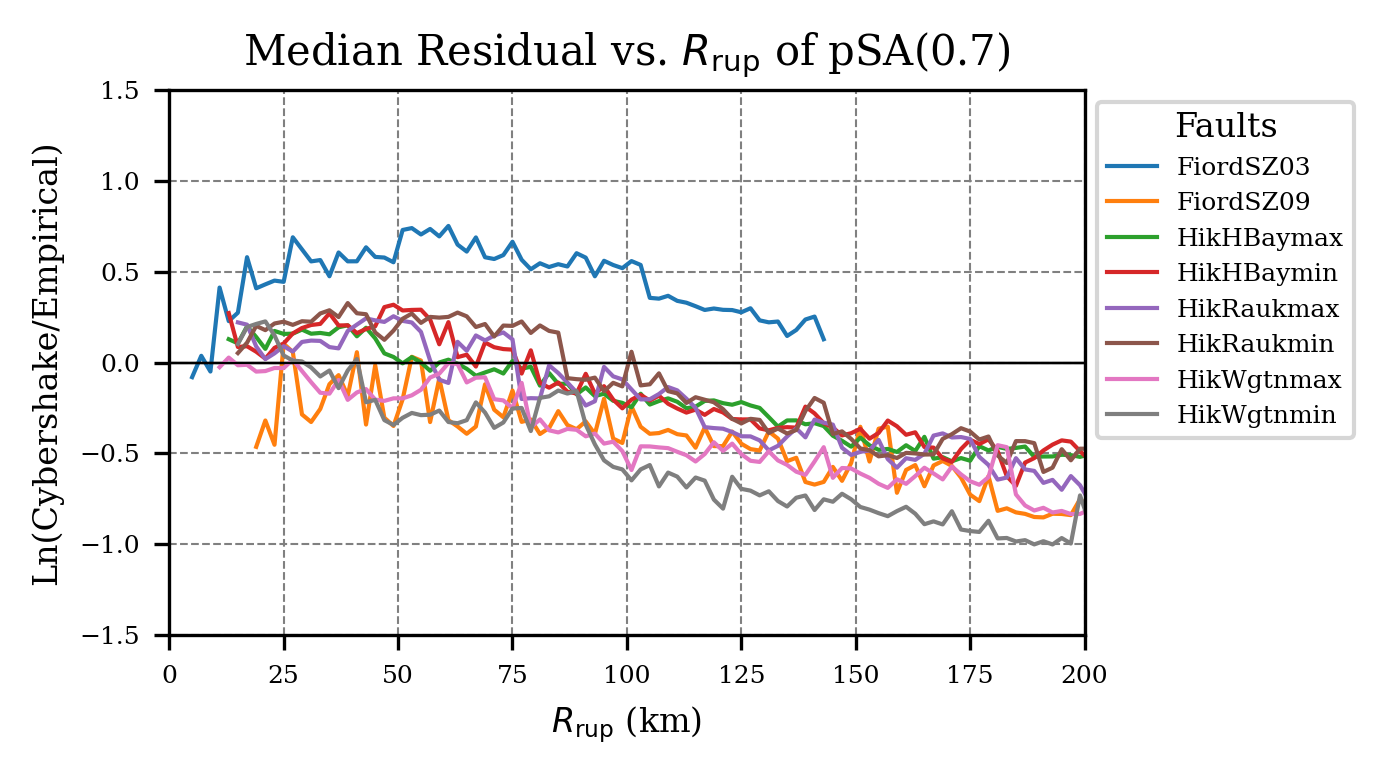

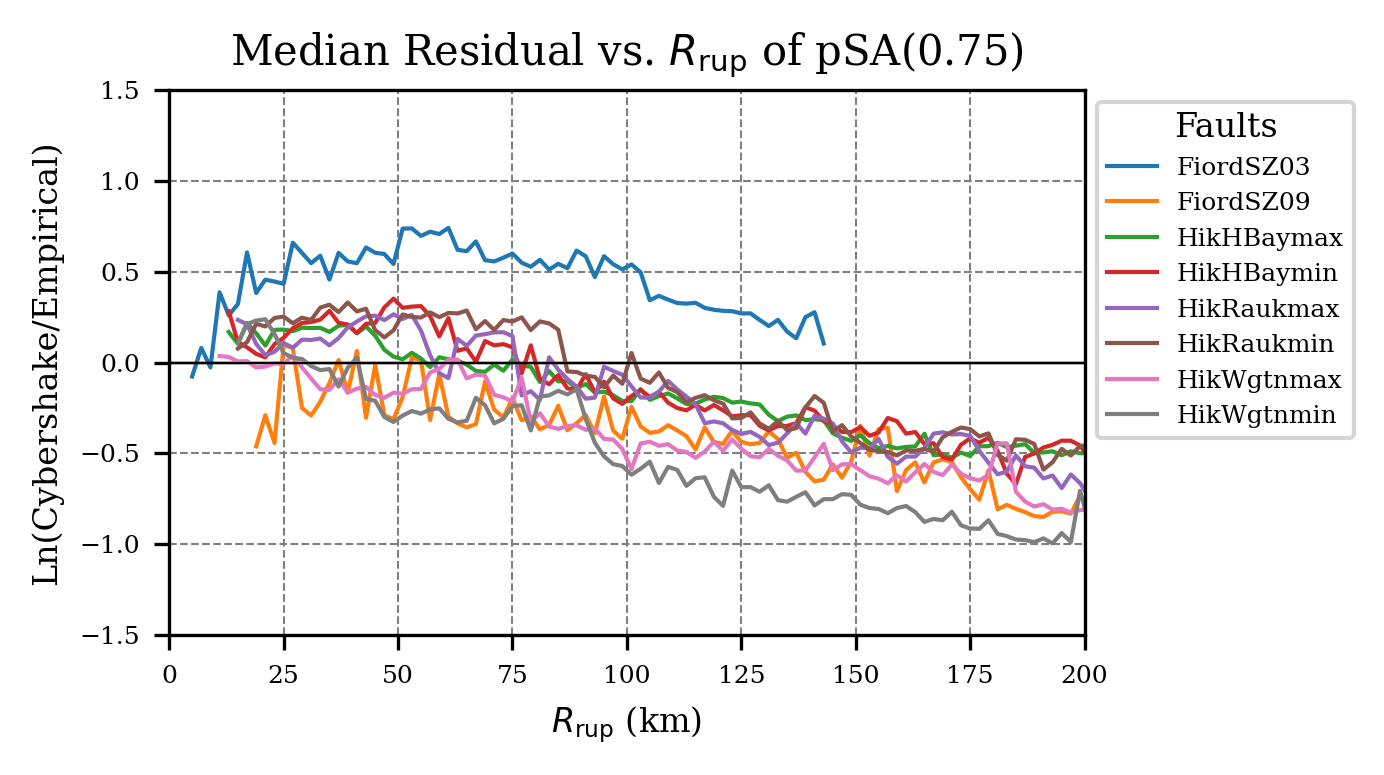

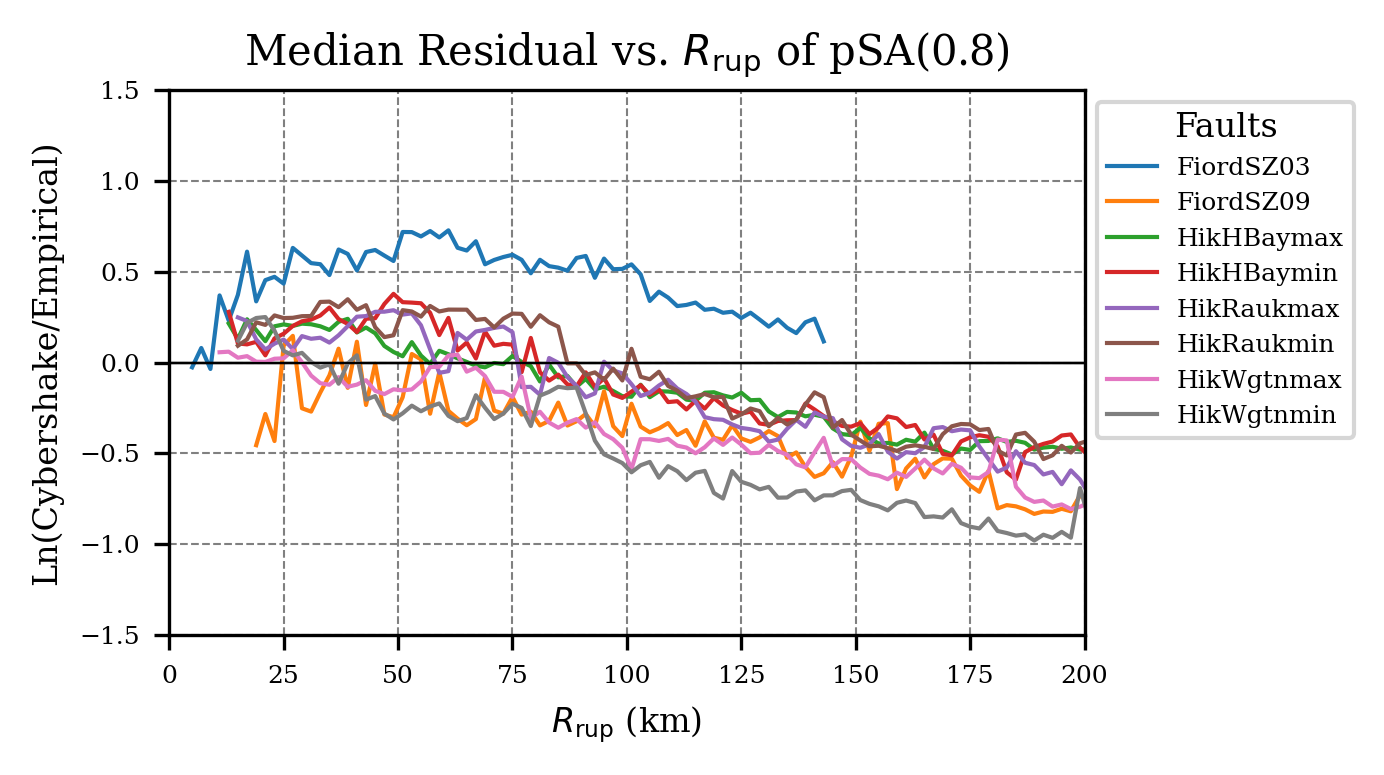

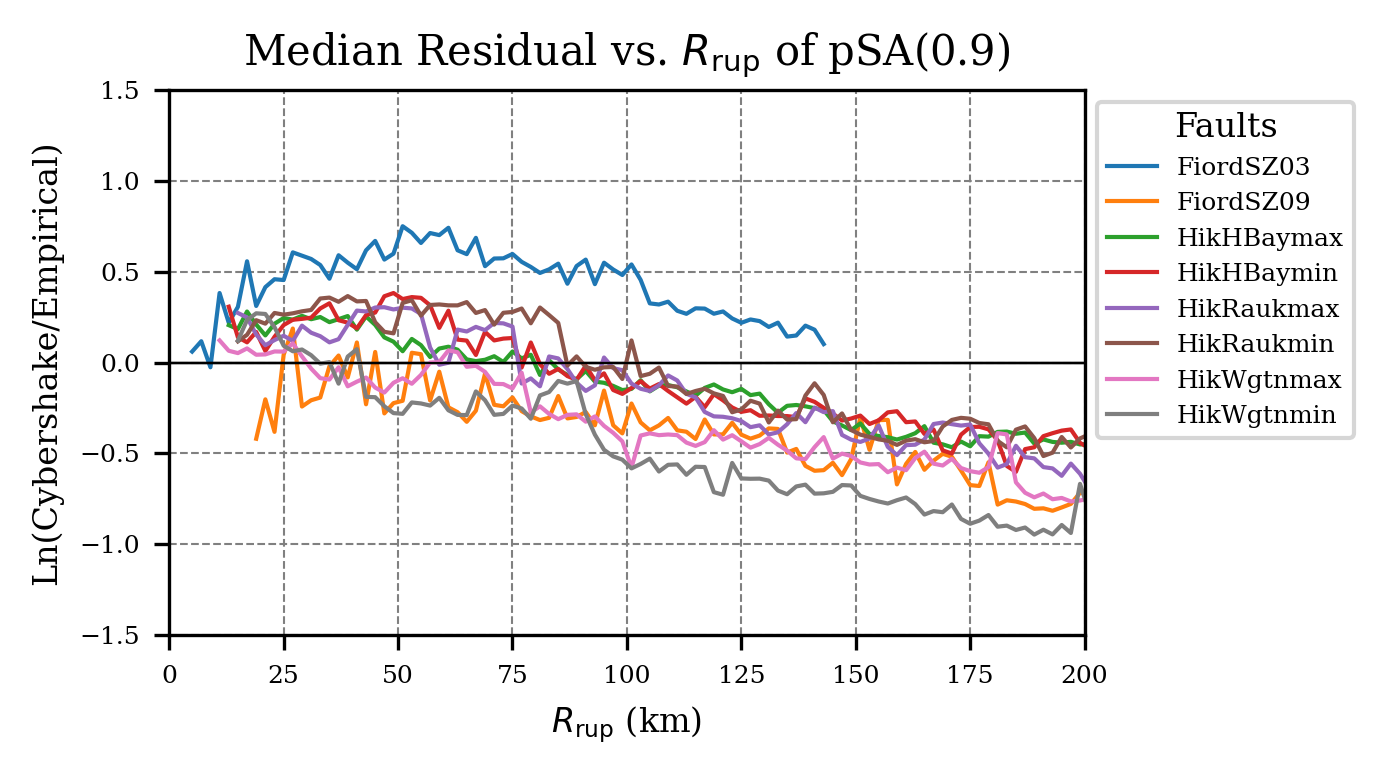

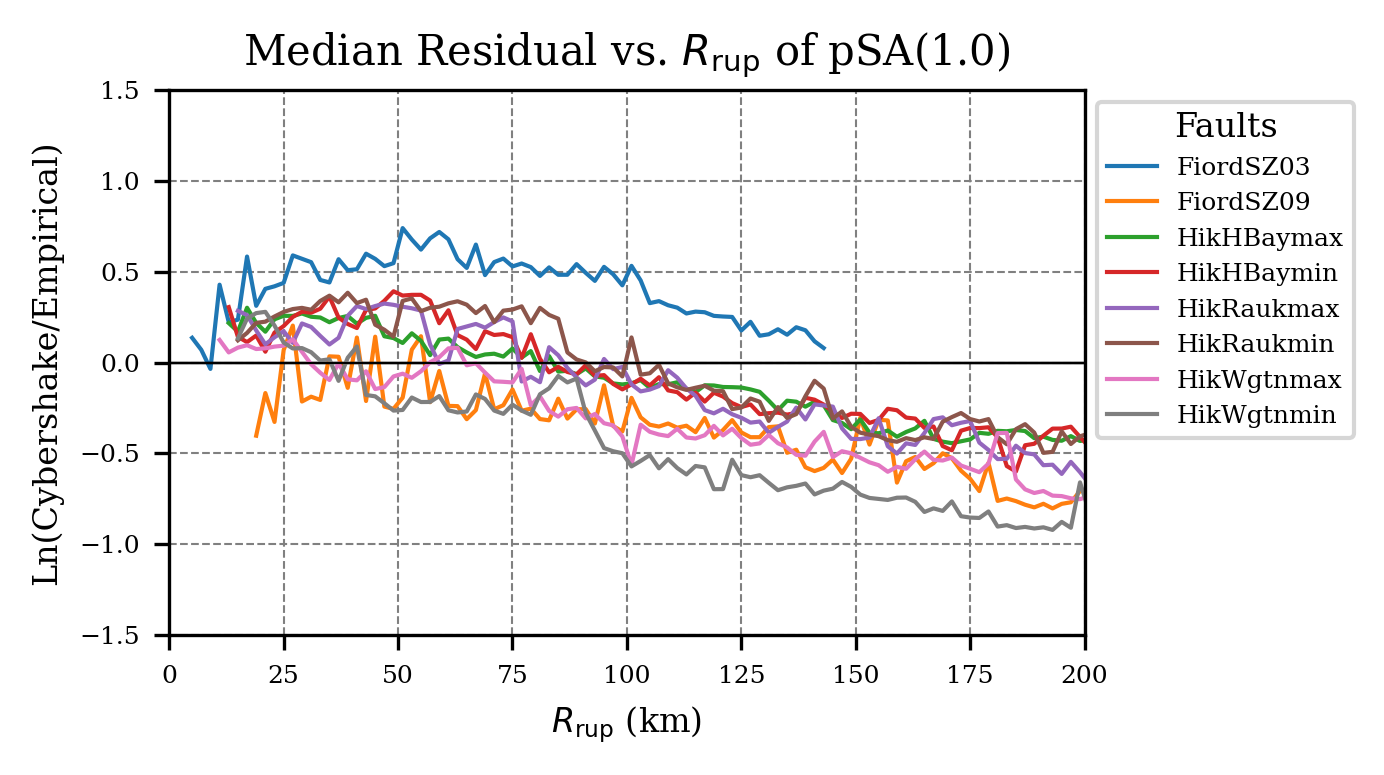

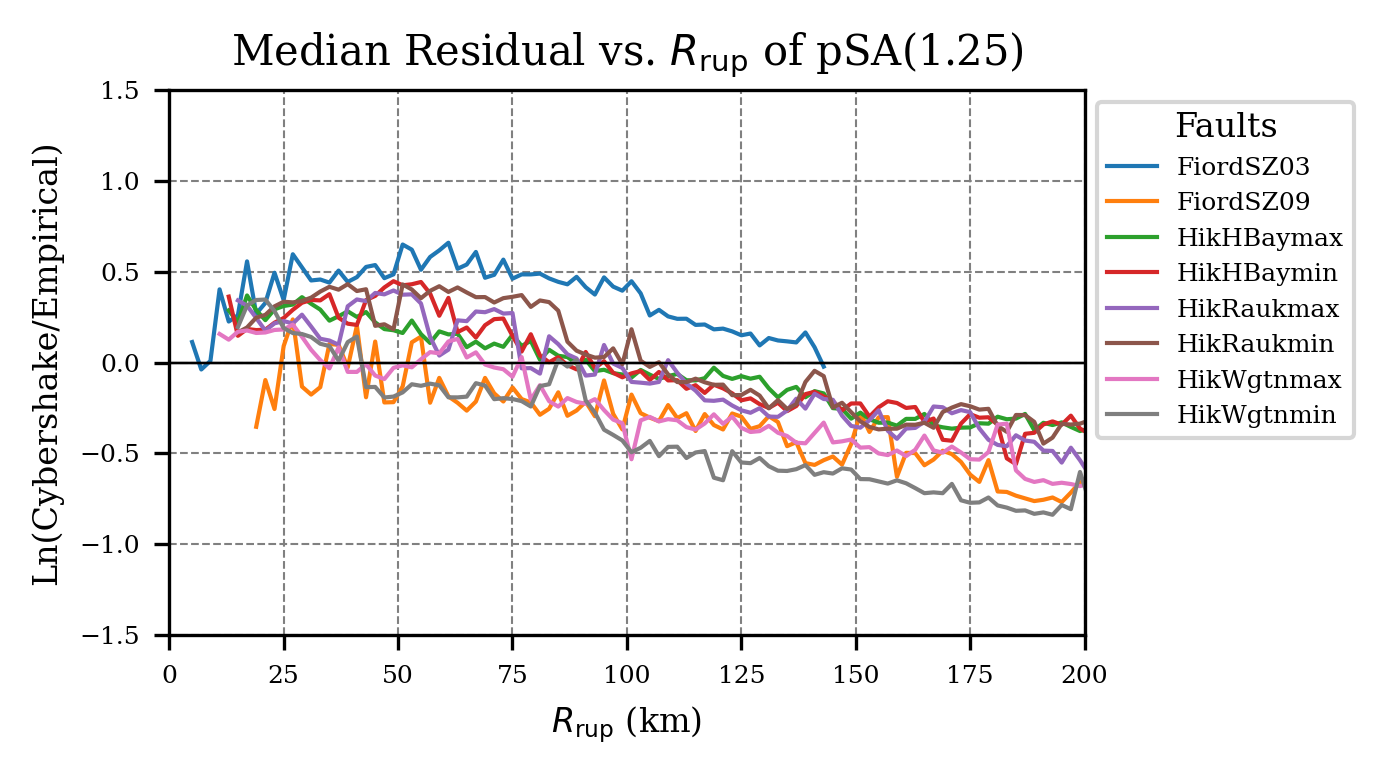

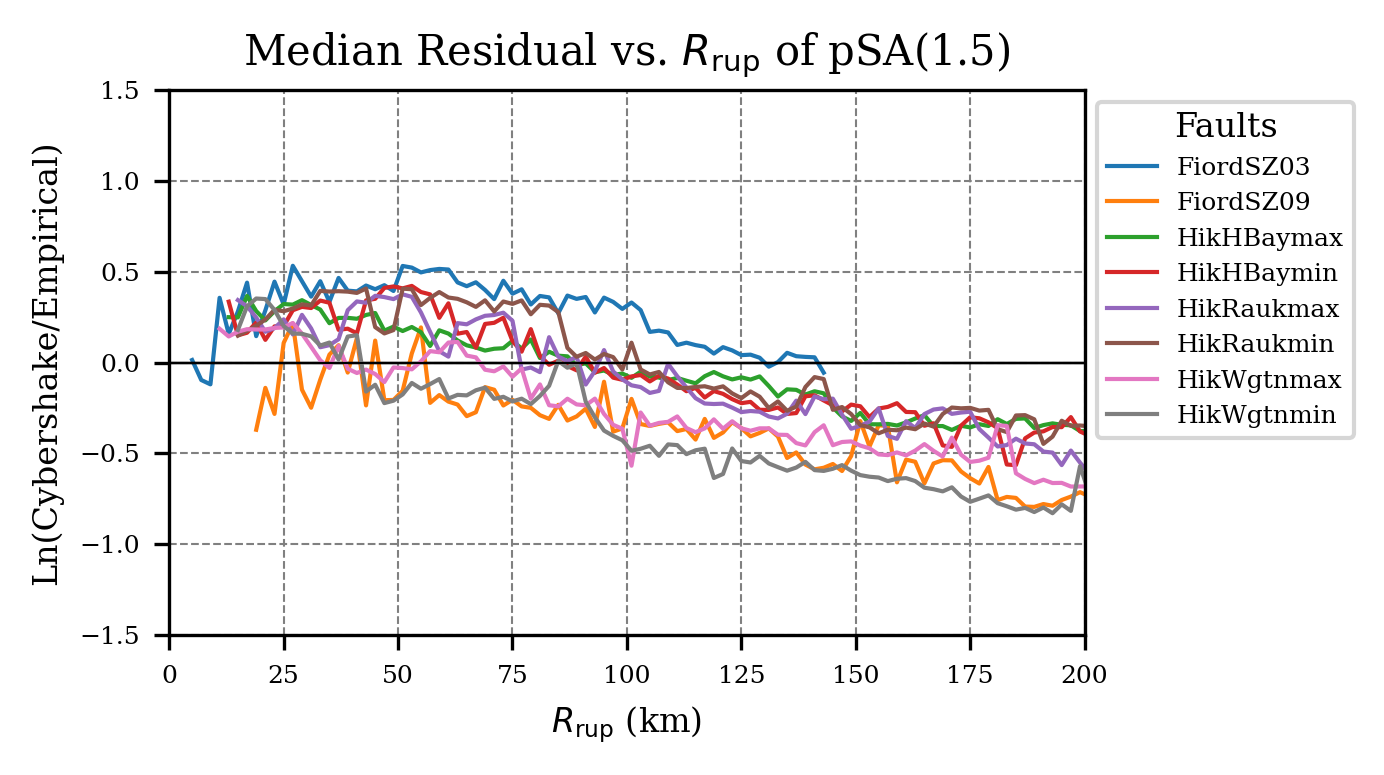

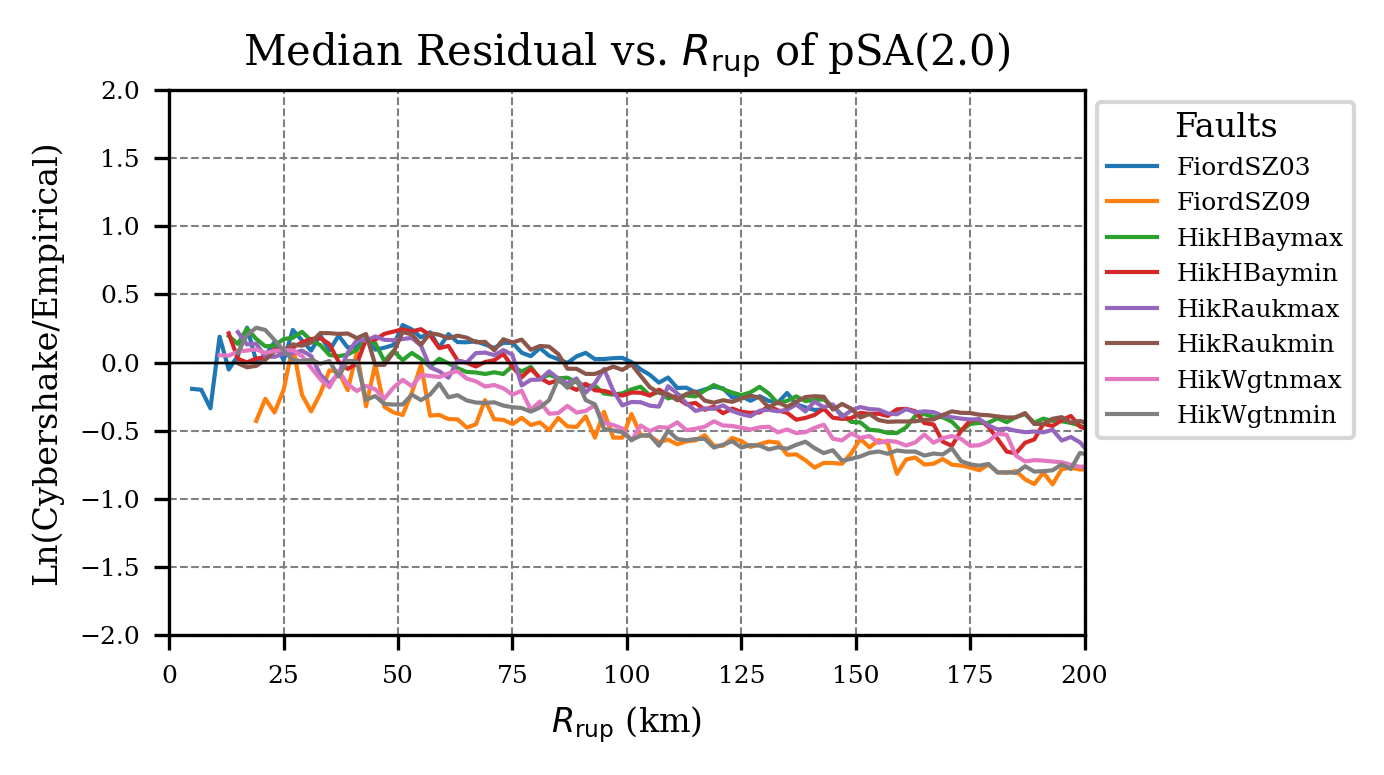

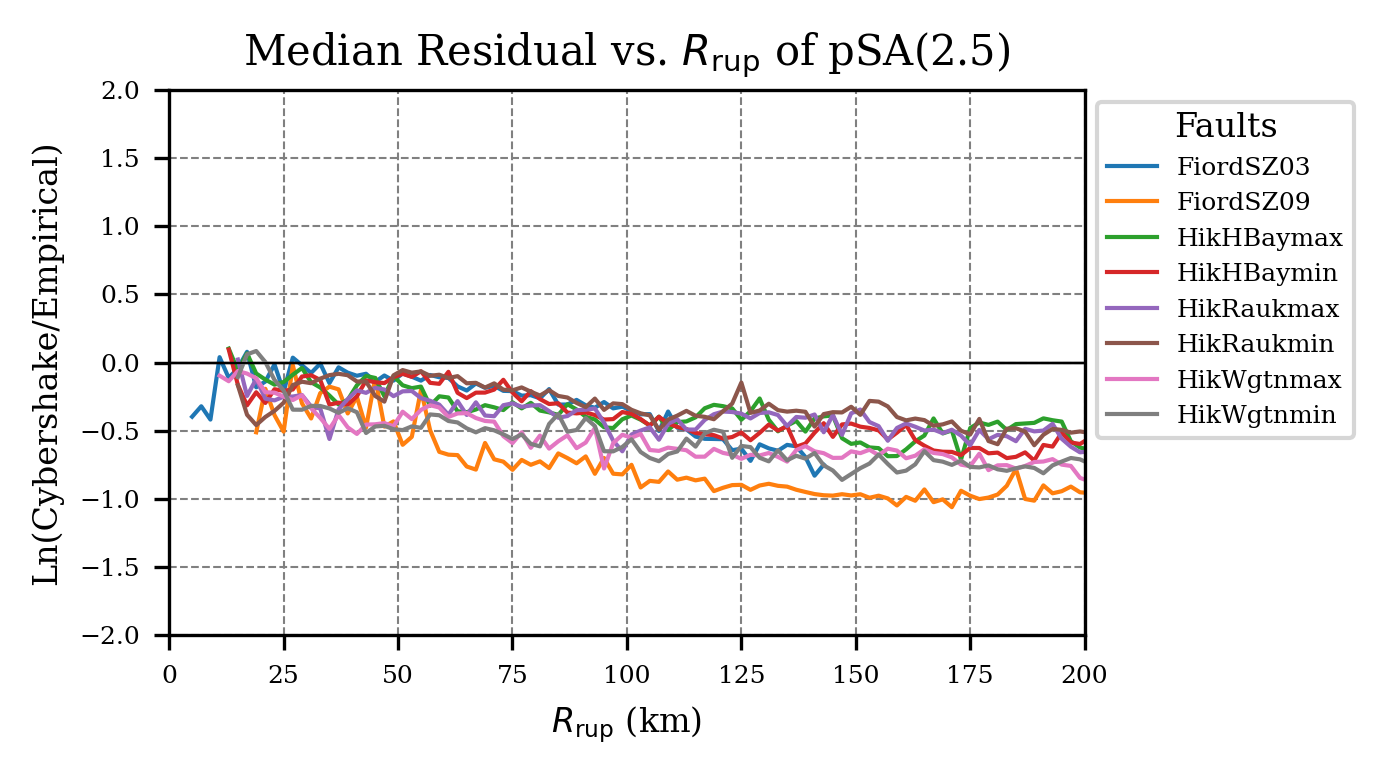

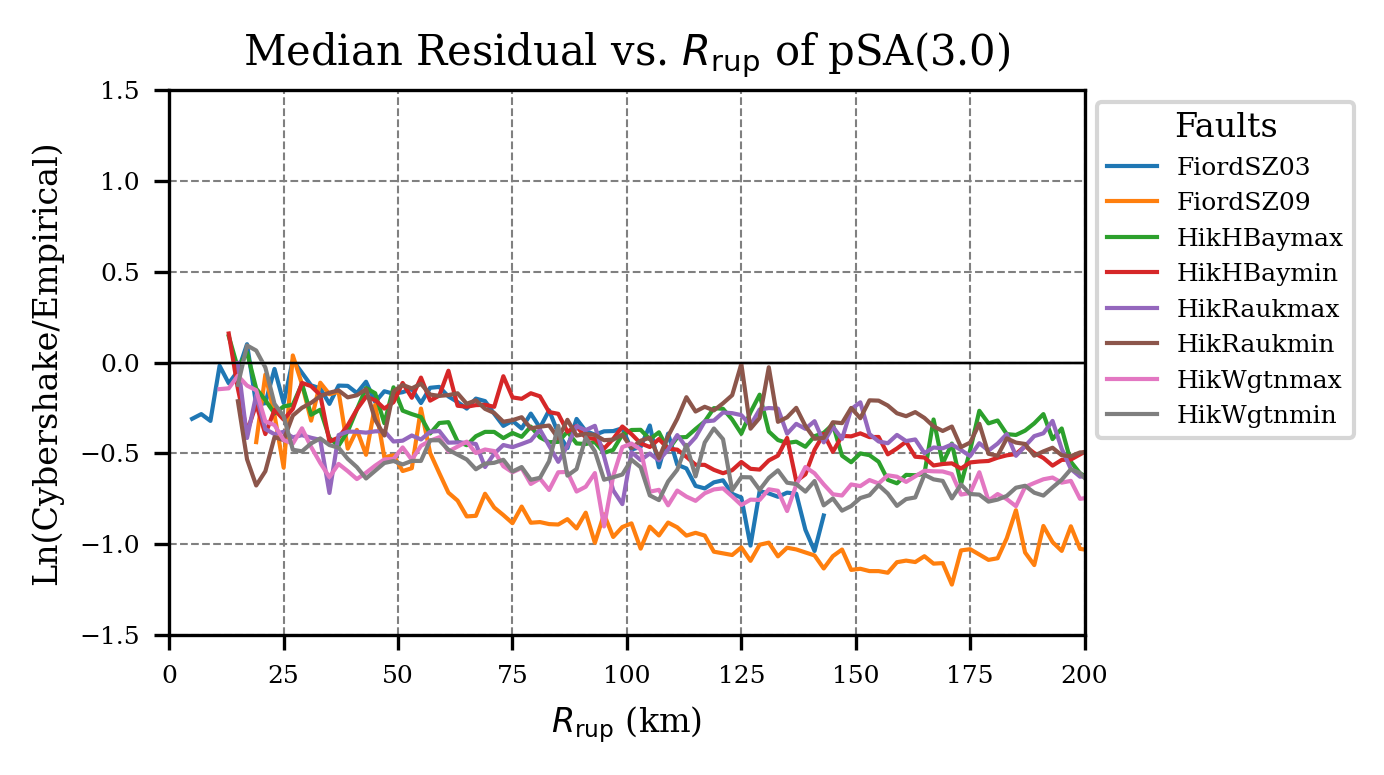

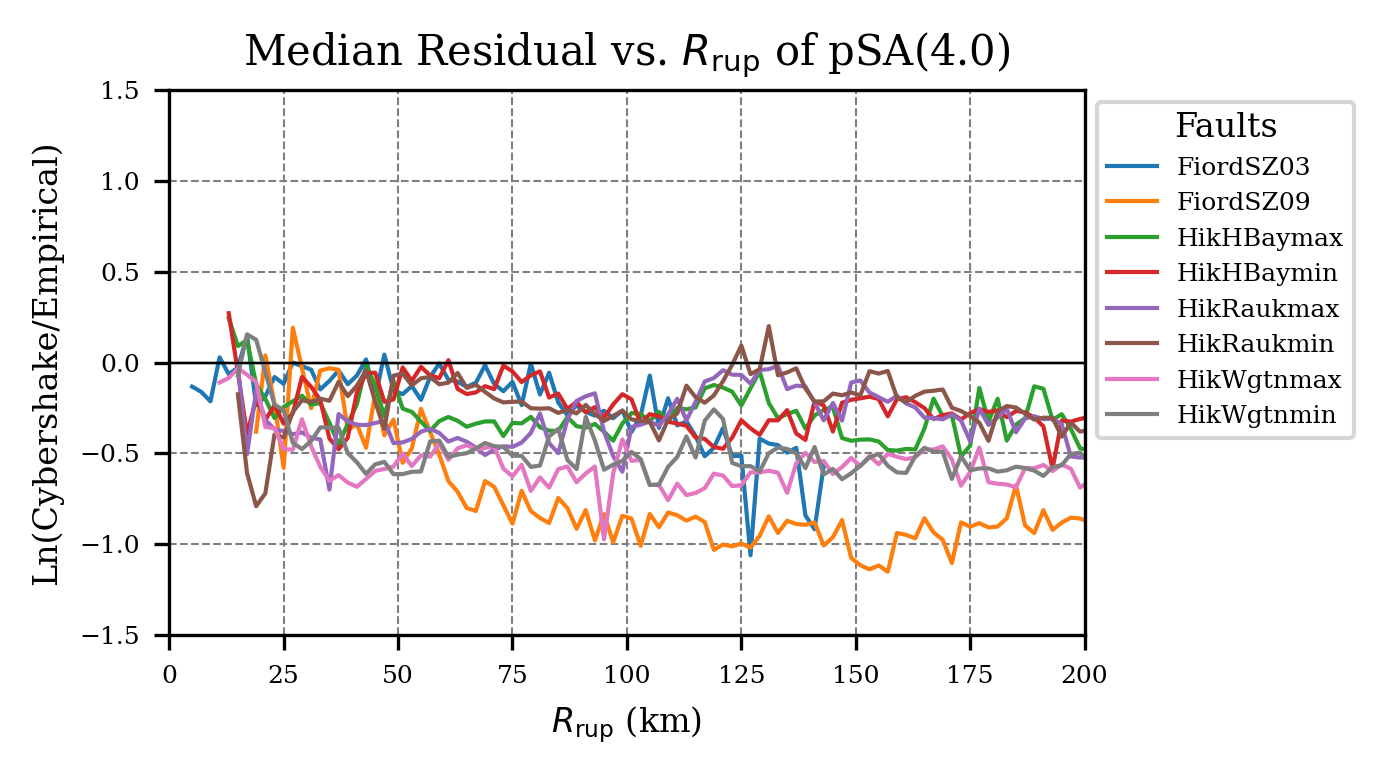

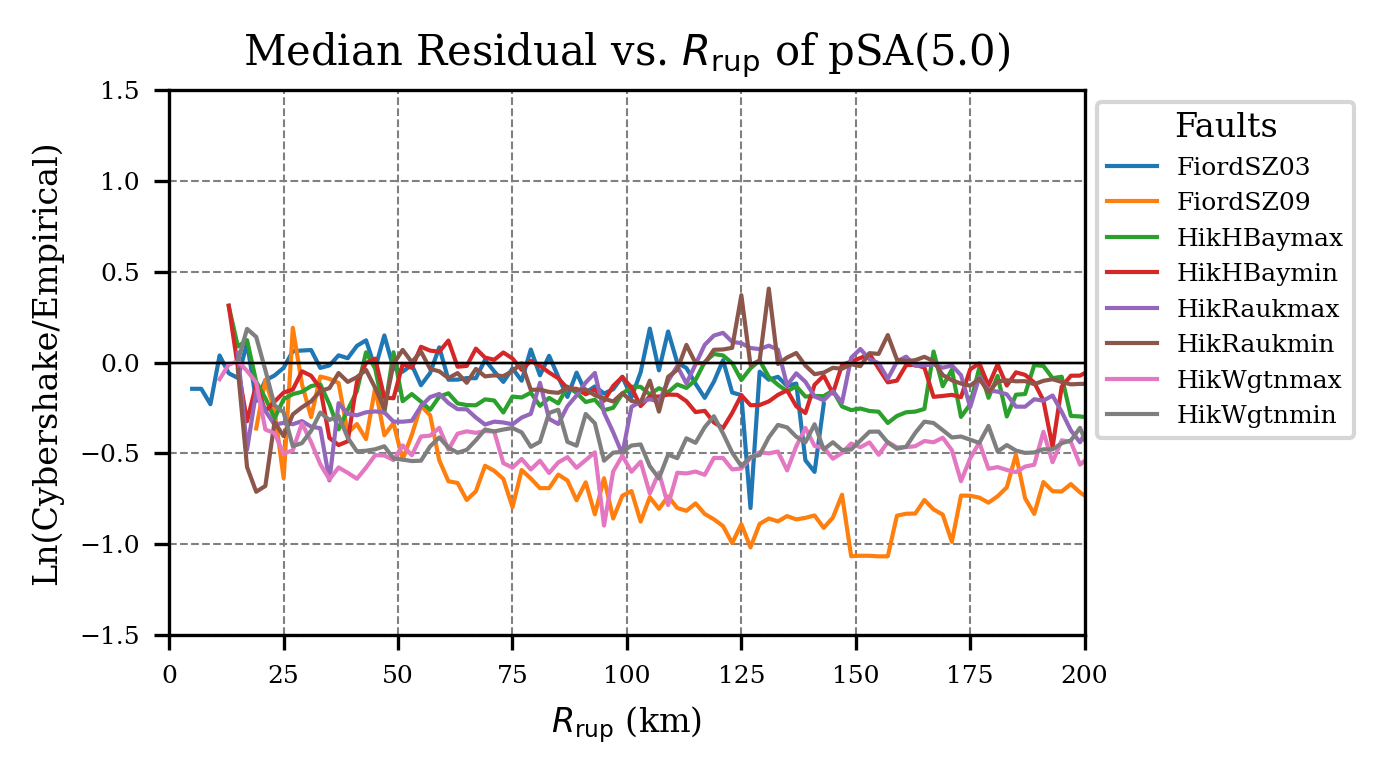

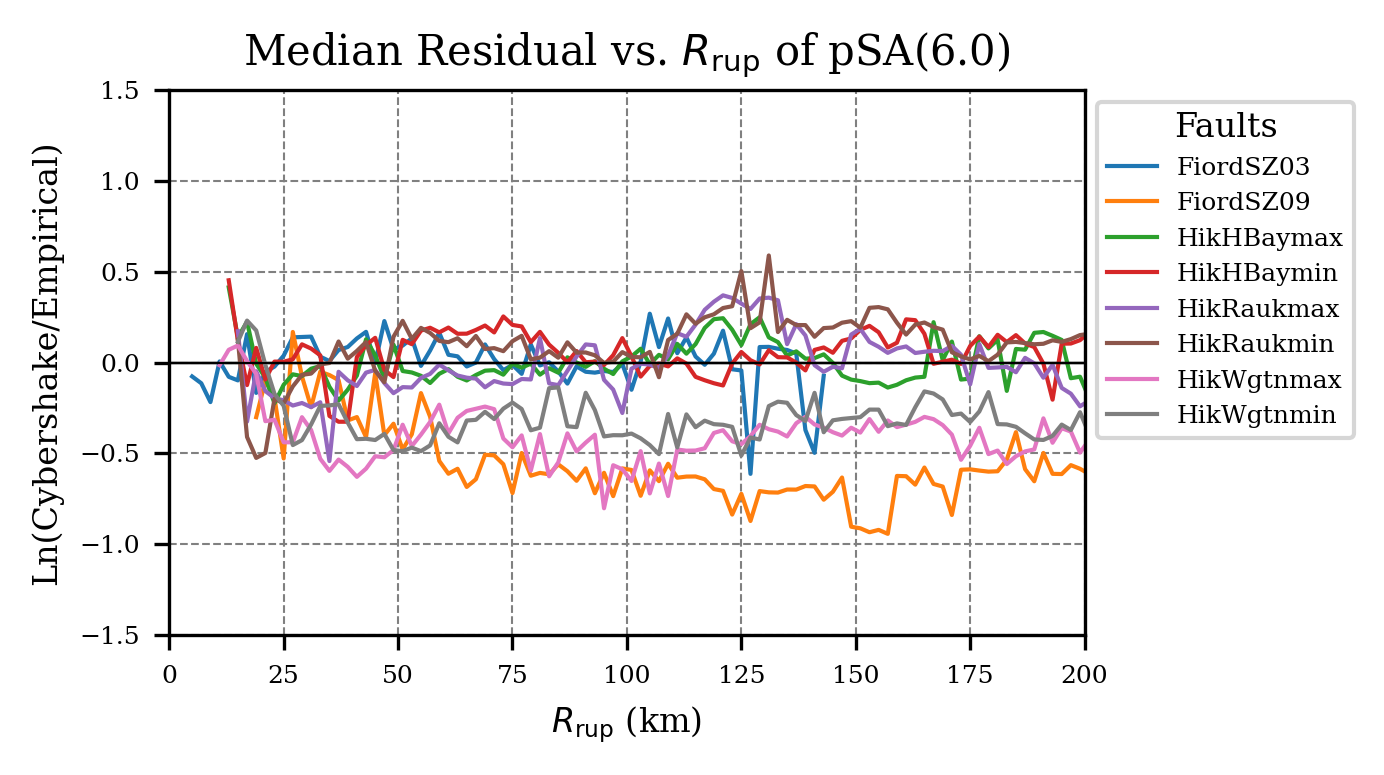

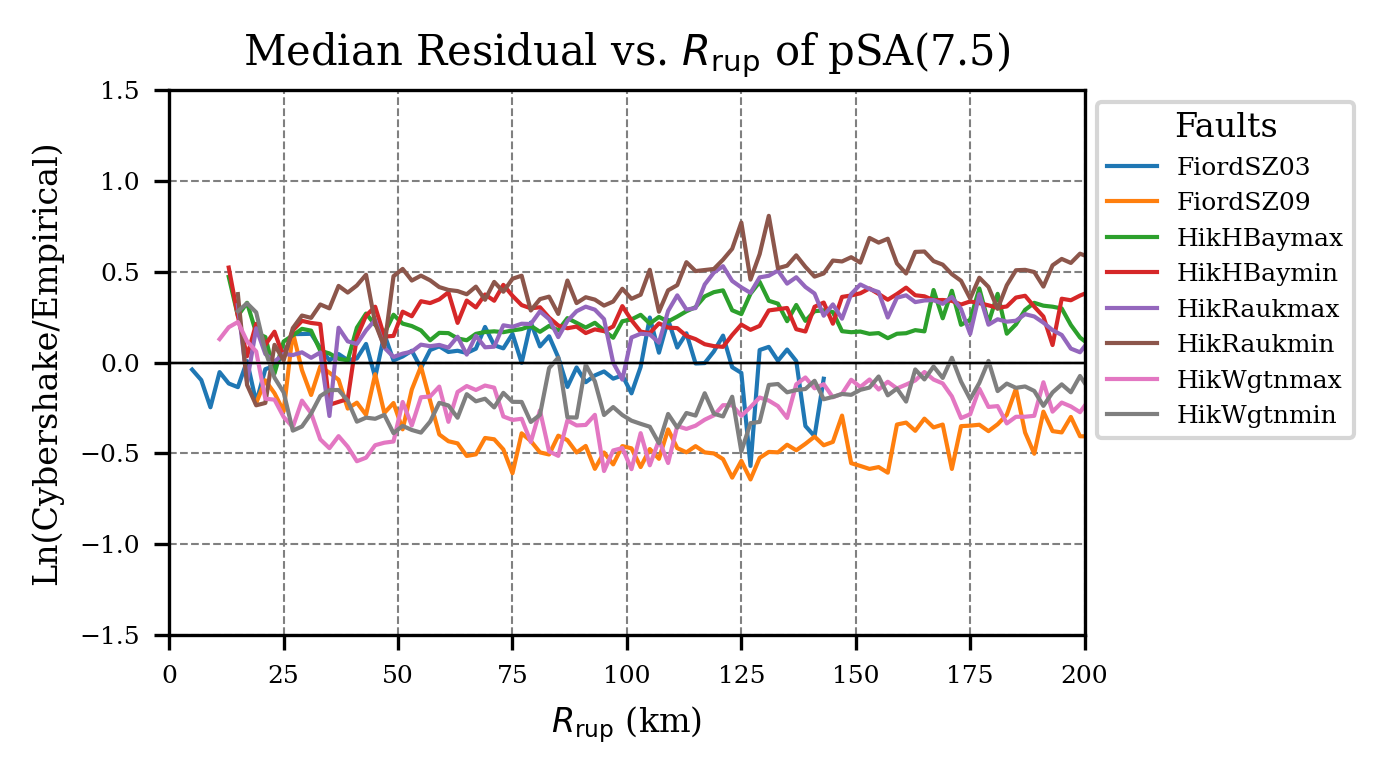

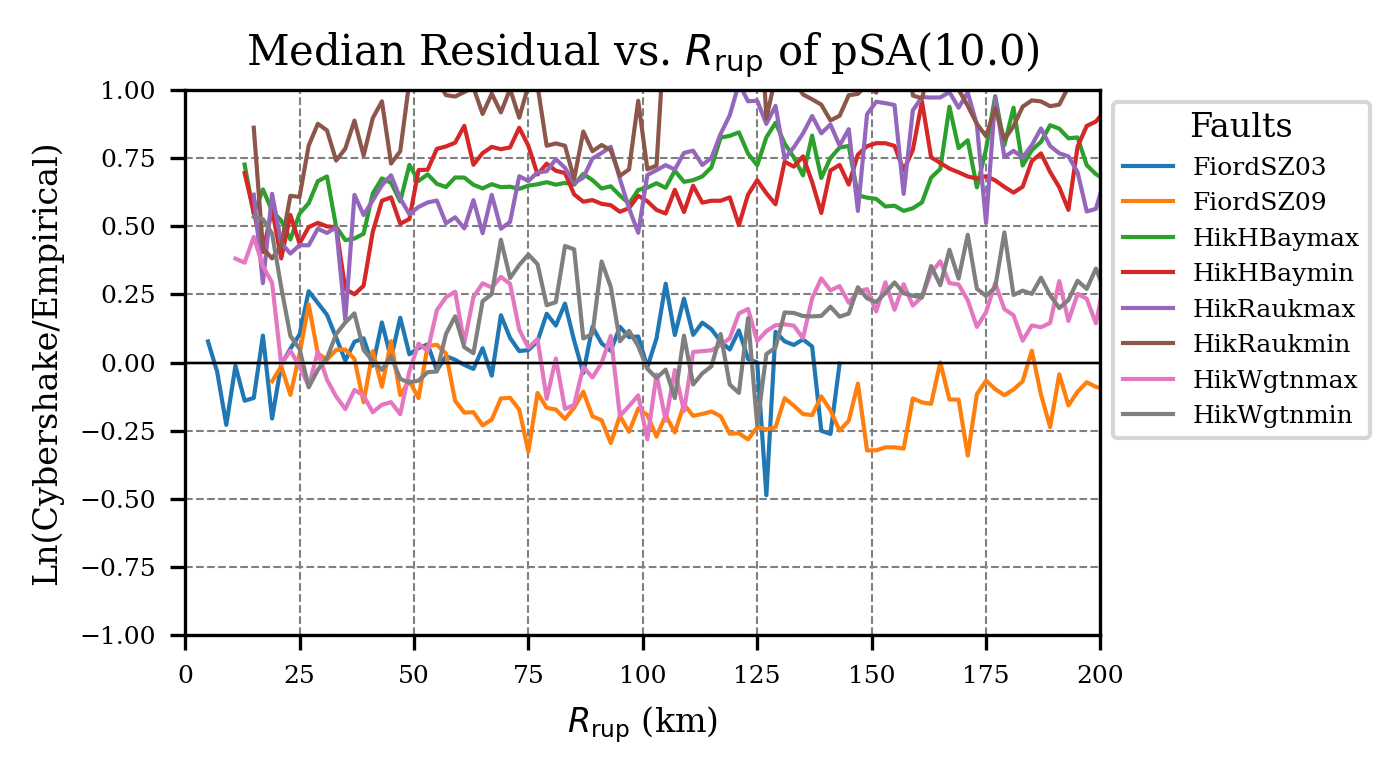

In [7]:
# set plot fonts
plt.rcParams.update(
    {
        "font.size": 8,  # General font size
        "font.family": "serif",  # Font family (e.g., serif, sans-serif, monospace)
        "axes.titlesize": 10,  # Title font size
        "axes.labelsize": 8,  # Axis label font size
        "xtick.labelsize": 6,  # X-axis tick font size
        "ytick.labelsize": 6,  # Y-axis tick font size
        "legend.fontsize": 6,  # Legend font size
    }
)



cm_to_inch = 1 / 2.54
distance_bin_size = 2  # 20 km
IMs = [
    "pSA_0.01",
    "pSA_0.02",
    "pSA_0.03",
    "pSA_0.04",
    "pSA_0.05",
    "pSA_0.075",
    "pSA_0.1",
    "pSA_0.12",
    "pSA_0.15",
    "pSA_0.17",
    "pSA_0.2",
    "pSA_0.25",
    "pSA_0.3",
    "pSA_0.4",
    "pSA_0.5",
    "pSA_0.6",
    "pSA_0.7",
    "pSA_0.75",
    "pSA_0.8",
    "pSA_0.9",
    "pSA_1.0",
    "pSA_1.25",
    "pSA_1.5",
    "pSA_2.0",
    "pSA_2.5",
    "pSA_3.0",
    "pSA_4.0",
    "pSA_5.0",
    "pSA_6.0",
    "pSA_7.5",
    "pSA_10.0",
]


for im in IMs:

    maxRrup = max(
        [temp_df["rrup"].max() for temp_df in Station_Rrup_Res_Dic[im].values()]
    )

    fig, ax = plt.subplots(figsize=(10 * cm_to_inch, 6 * cm_to_inch), dpi=300)

    for fault, data_df in Station_Rrup_Res_Dic[im].items():

        data_df["rrup_bin_center"] = (
            (data_df["rrup"] // distance_bin_size) * distance_bin_size
        ) + (distance_bin_size / 2)

        median_df = (
            data_df.groupby("rrup_bin_center")
            .agg(median_residual=(im, "median"))
            .dropna()
            .reset_index()
        )

        x_lim = maxRrup
        x_lim = 200

        overall_y_min = median_df["median_residual"].min()
        overall_y_max = median_df["median_residual"].max()
        y_lim = ((max(abs(overall_y_min), abs(overall_y_max)) // 0.5) + 1) * 0.5

        ax.plot(median_df["rrup_bin_center"], median_df["median_residual"], label=fault, linewidth=1)
        ax.set_xlim([0, x_lim])
        ax.set_ylim([-1 * y_lim, y_lim])

        ax.set_xlabel(r"$R_{\mathrm{rup}}$ (km)")
        ax.set_ylabel("Ln(Cybershake/Empirical)")
        ax.set_title(
            f"Median Residual vs. $R_{{\\mathrm{{rup}}}}$ of {im.replace("_", "(") + ")"}"
        )
        ax.legend(
            loc="upper left",
            bbox_to_anchor=(1, 1),
            title="Faults",
            title_fontsize=8,
        )
        ax.grid(True, linestyle="--", linewidth=0.5, color="gray")
        ax.axhline(0, color="black", linewidth=0.5, linestyle="-")

    filename = os.path.join(output_dir, str(im) + '.png')
    fig.savefig(filename, dpi=300, bbox_inches="tight")